In [11]:

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate


llm = ChatOpenAI()
llm.invoke('how can we do 22 + 322 easily')

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are world class technical documentation writer."),
    ("user", "{input}")
])


chain = prompt | llm 
chain.invoke({"input": "what is the best way to write technical documentation"})

AIMessage(content='The best way to write technical documentation is to follow a systematic approach that ensures clarity, accuracy, and comprehensiveness. Here are some steps to help you write effective technical documentation:\n\n1. Understand the audience: Identify who will be using the documentation and what their level of technical expertise is. Tailor your writing style and level of detail accordingly.\n\n2. Define the purpose: Clearly define the goals and objectives of the documentation. Are you providing instructions, troubleshooting information, or reference material? Understanding the purpose will help you structure your content effectively.\n\n3. Plan and outline: Create a logical structure for your documentation. Break it down into sections, chapters, or modules, depending on the complexity of the subject matter. A well-organized outline will guide your writing process and make it easier for readers to navigate the documentation.\n\n4. Use plain language: Write in a clear, c

In [7]:

from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_template("tell me a joke about {foo}")
model = ChatOpenAI()
chain = prompt | model
chain.invoke({"foo": "bears"})


AIMessage(content='Why did the bear bring a ladder to the picnic?\n\nBecause it heard the food was at the top of the food chain!')

Now Let's try to chain with a REPL 

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL
from langchain_openai import ChatOpenAI

In [22]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI(temperature=0.2)

In [23]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [25]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

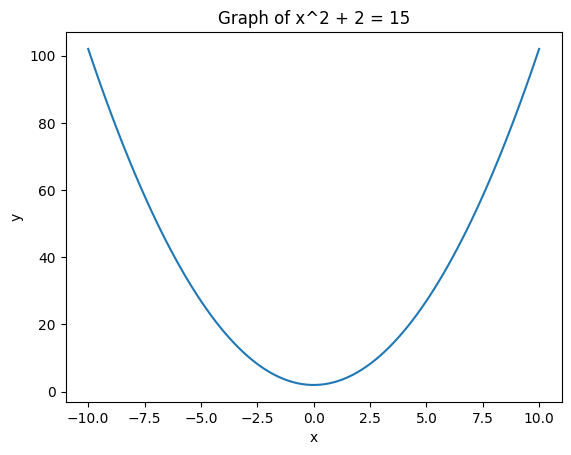

''

In [28]:
chain.invoke({"input": "graph of x^2 plus 2 equals 15"})

Now that I know it works I'll try to create a template that suits my purpose.
Ideally you need a few templates, one for each use case. 
I will go back and add libraries I will need also. 

In [115]:
import pandas as pd 
df = pd.read_html('./players_Big 5 European Leagues Combined_2324_standard.html')
df = df[0]
df.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA                 MF   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5  Salis Abdul Samed             gh GHA                 MF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League             24-005   
1       Union Berlin       de Bundesliga             23-079   
2     Eint Frankfurt       de Bundesliga             20-136   
3              Reims          fr Ligue 1             36-103   
4               Lens          fr Ligue 1             23-289   

  Unnamed: 7_level_0 Playing Time         ... Per 90 Minutes              \
                Born           MP Starts  ...            Ast   G+A  G-PK   
0               2000           13     11  ...           0.09  0.09  0.00   
1               2000           11      4  ...           0.00  0.00  0.00   
2               2003            7      1  ...           0.89  0.89  0.00   
3               1987           16     16  ...           0.00  0.19  0.19   
4               2000           17     14  ...           0.00  0.00  0.00   

                                           Unnamed: 37_level_0  
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0   0.09  0.00  0.07   0.07  0.00     0.07             Matches  
1   0.00  0.04  0.07   0.11  0.04     0.11             Matches  
2   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3   0.19  0.14  0.01   0.15  0.14     0.15             Matches  
4   0.00  0.06  0.04   0.10  0.06     0.10             Matches  

[5 rows x 38 columns]

In [116]:
df.reset_index(inplace=True)


index Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                        Rk             Player             Nation   
0     0                  1         Max Aarons            eng ENG   
1     1                  2   Brenden Aaronson             us USA   
2     2                  3    Paxten Aaronson             us USA   
3     3                  4   Yunis Abdelhamid             ma MAR   
4     4                  5  Salis Abdul Samed             gh GHA   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 DF        Bournemouth  eng Premier League   
1                 MF       Union Berlin       de Bundesliga   
2                 MF     Eint Frankfurt       de Bundesliga   
3                 DF              Reims          fr Ligue 1   
4                 MF               Lens          fr Ligue 1   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time  ... Per 90 Minutes  \
                 Age               Born           MP  ...            Ast   
0             24-005               2000           13  ...           0.09   
1             23-079               2000           11  ...           0.00   
2             20-136               2003            7  ...           0.89   
3             36-103               1987           16  ...           0.00   
4             23-289               2000           17  ...           0.00   

                                                       Unnamed: 37_level_0  
    G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG             Matches  
0  0.09  0.00   0.09  0.00  0.07   0.07  0.00     0.07             Matches  
1  0.00  0.00   0.00  0.04  0.07   0.11  0.04     0.11             Matches  
2  0.89  0.00   0.89  0.11  0.07   0.19  0.11     0.19             Matches  
3  0.19  0.19   0.19  0.14  0.01   0.15  0.14     0.15             Matches  
4  0.00  0.00   0.00  0.06  0.04   0.10  0.06     0.10             Matches  

[5 rows x 39 columns]

0       17
1        4
2        2
3       23
4        7
        ..
2523    11
2524    25
2525    49
2526     2
2527    14
Name: PrgC, Length: 2528, dtype: object

In [117]:
df.columns = df.columns.droplevel(0)

In [118]:
df.columns =['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90']


In [112]:
[ 'Age', 
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

In [131]:
df['Age'] = df['Age'].str[:2]
df['Age'] =pd.to_numeric(df['Age'], errors='coerce')
df['90s'] =pd.to_numeric(df['90s'], errors='coerce')

In [135]:
columns_to_convert = ['MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
                      'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
                      'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90',
                      'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.MP = pd.to_numeric(df.MP, errors='coerce')

In [147]:
u_prompt = "top ten players with more than 5 goals"
players_with_more_than_5_goals = df[df['Gls'] > 5][['Player', 'Comp','Gls', 'MP', 'Nation', 'Age', 'xG']] 
players_with_more_than_5_goals = players_with_more_than_5_goals.sort_values(by='Gls', ascending=False)
players_with_more_than_5_goals.head(10)


,Player,Comp,Gls,MP,Nation,Age,xG
1128,Harry Kane,de Bundesliga,21.0,15.0,eng ENG,30,15.1
1478,Kylian Mbappé,fr Ligue 1,18.0,16.0,fr FRA,25,14.9
918,Serhou Guirassy,de Bundesliga,17.0,14.0,gn GUI,27,11.6
1439,Lautaro Martínez,it Serie A,16.0,17.0,ar ARG,26,9.7
933,Erling Haaland,eng Premier League,14.0,15.0,no NOR,23,14.8
2037,Mohamed Salah,eng Premier League,14.0,20.0,eg EGY,31,14.3
222,Jude Bellingham,es La Liga,13.0,17.0,eng ENG,20,7.2
1469,Borja Mayoral,es La Liga,12.0,19.0,es ESP,26,8.7
989,Son Heung-min,eng Premier League,12.0,20.0,kr KOR,31,7.1
1581,Álvaro Morata,es La Liga,12.0,18.0,es ESP,31,8.7


In [152]:
u_prompt = "players with most xg in the epl "
players_eng_xg = df[df['Comp'] == 'eng Premier League'][['Player', 'Comp', 'xG', 'MP', 'Nation', 'Age']]
players_eng_xg = players_eng_xg.sort_values(by='xG', ascending=False)
players_eng_xg.head(10).to_json(orient='records')


'[{"Player":"Erling Haaland","Comp":"eng Premier League","xG":14.8,"MP":15.0,"Nation":"no NOR","Age":"23"},{"Player":"Mohamed Salah","Comp":"eng Premier League","xG":14.3,"MP":20.0,"Nation":"eg EGY","Age":"31"},{"Player":"Dominic Solanke","Comp":"eng Premier League","xG":11.0,"MP":19.0,"Nation":"eng ENG","Age":"26"},{"Player":"Nicolas Jackson","Comp":"eng Premier League","xG":10.6,"MP":19.0,"Nation":"sn SEN","Age":"22"},{"Player":"Alexander Isak","Comp":"eng Premier League","xG":9.2,"MP":15.0,"Nation":"se SWE","Age":"24"},{"Player":"Ollie Watkins","Comp":"eng Premier League","xG":9.0,"MP":20.0,"Nation":"eng ENG","Age":"28"},{"Player":"Darwin N\\u00fa\\u00f1ez","Comp":"eng Premier League","xG":8.6,"MP":19.0,"Nation":"uy URU","Age":"24"},{"Player":"Bryan Mbeumo","Comp":"eng Premier League","xG":8.5,"MP":15.0,"Nation":"cm CMR","Age":"24"},{"Player":"Jarrod Bowen","Comp":"eng Premier League","xG":7.4,"MP":19.0,"Nation":"eng ENG","Age":"27"},{"Player":"Jo\\u00e3o Pedro","Comp":"eng Premier 

In [151]:
u_prompt = "top goal scorer in la liga"
players_laliga = df[df['Comp'] == 'es La Liga'][['Player', 'Comp', 'Gls', 'MP', 'Nation', 'Age']]
players_laliga = players_laliga.sort_values(by='Gls', ascending=False)
s = players_laliga.head(1)
s.to_json(orient='records')

'[{"Player":"Jude Bellingham","Comp":"es La Liga","Gls":13.0,"MP":17.0,"Nation":"eng ENG","Age":"20"}]'

In [125]:
def check_column_types(df):
    column_types = []
    for column in df.columns:
        column_type = df[column].dtype
        column_types.append((column, column_type))
    return column_types
print(check_column_types(df))

[('', dtype('int64')), ('Rk', dtype('O')), ('Player', dtype('O')), ('Nation', dtype('O')), ('Pos', dtype('O')), ('Squad', dtype('O')), ('Comp', dtype('O')), ('Age', dtype('O')), ('Born', dtype('O')), ('MP', dtype('O')), ('Starts', dtype('O')), ('Min', dtype('O')), ('90s', dtype('O')), ('Gls', dtype('O')), ('Ast', dtype('O')), ('G+A', dtype('O')), ('G-PK', dtype('O')), ('PK', dtype('O')), ('PKatt', dtype('O')), ('CrdY', dtype('O')), ('CrdR', dtype('O')), ('xG', dtype('O')), ('npxG', dtype('O')), ('xAG', dtype('O')), ('npxG+xAG', dtype('O')), ('PrgC', dtype('O')), ('PrgP', dtype('O')), ('PrgR', dtype('O')), ('Gls/90', dtype('O')), ('Ast/90', dtype('O')), ('G+A/90', dtype('O')), ('G-PK/90', dtype('O')), ('G+A-PK/90', dtype('O')), ('xG/90', dtype('O')), ('xAG/90', dtype('O')), ('xG+xAG/90', dtype('O')), ('npxG/90', dtype('O')), ('npxG+xAG/90', dtype('O')), ('Matches', dtype('O'))]


In [94]:
df1 = df.loc[df.Comp == 'fr Ligue 1']

df1


,,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Matches
3,3,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-103,1987,16,...,0.00,0.19,0.19,0.19,0.14,0.01,0.15,0.14,0.15,Matches
4,4,5,Salis Abdul Samed,gh GHA,MF,Lens,fr Ligue 1,23-289,2000,17,...,0.00,0.00,0.00,0.00,0.06,0.04,0.10,0.06,0.10,Matches
5,5,6,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,30-342,1993,17,...,0.06,0.12,0.06,0.12,0.03,0.05,0.08,0.03,0.08,Matches
6,6,7,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,20-287,2003,10,...,0.00,0.21,0.21,0.21,0.17,0.31,0.48,0.17,0.48,Matches
8,8,9,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,23-325,2000,5,...,0.00,0.72,0.48,0.48,0.52,0.04,0.56,0.33,0.37,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2488,2394,Warren Zaire-Emery,fr FRA,MF,Paris S-G,fr Ligue 1,17-307,2006,14,...,0.16,0.32,0.16,0.32,0.08,0.06,0.15,0.08,0.15,Matches
2489,2489,2395,Denis Zakaria,ch SUI,"MF,DF",Monaco,fr Ligue 1,27-050,1996,14,...,0.00,0.08,0.08,0.08,0.06,0.01,0.07,0.06,0.07,Matches
2504,2504,2409,Mehdi Zeffane,dz ALG,"DF,MF",Clermont Foot,fr Ligue 1,31-235,1992,15,...,0.00,0.00,0.00,0.00,0.18,0.04,0.21,0.18,0.21,Matches
2511,2511,2416,Nathan Zeze,fr FRA,DF,Nantes,fr Ligue 1,18-205,2005,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches


In [126]:

df_defenders_under_21 = df[(df['Pos'].str.contains('DF'))]
df_defenders_under_21 = df_defenders_under_21[['Player', 'Squad', 'Pos', 'Age', 'Gls', 'MP']]
df_defenders_under_21.sort_values(by='MP', ascending=False, inplace=True)
print(df_defenders_under_21.head(5))

                    Player    Squad Pos     Age Gls MP
2109          Perr Schuurs   Torino  DF  24-044   1  9
585         Bafodé Diakité    Lille  DF  23-003   3  9
563        Hannes Delcroix  Burnley  DF  24-315   0  9
2039            Kike Salas  Sevilla  DF  21-261   2  9
555   Lorenzo De Silvestri  Bologna  DF  35-231   2  9


In [108]:
df['Age'] = df['Age'].str[:2]
#create a new column with the age as an int
df['Age']

0       24
1       23
2       20
3       36
4       23
        ..
2523    26
2524    24
2525    25
2526    33
2527    20
Name: Age, Length: 2528, dtype: object

In [106]:
df['Age']

0       24
1       23
2       20
3       36
4       23
        ..
2523    26
2524    24
2525    25
2526    33
2527    20
Name: Age, Length: 2528, dtype: object

In [ ]:
prompt = ''' 
A dataframe is such that df.columns =['', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']  it holds football records of players in the top 5 leagues in Europe.
       
       generate python  code to find the answers to questions below:
       who is the top goalscorer in france league?
       df[df.Comp == 'fr Ligue 1']['Gls'].max()'''